# DNN to predict the compressive strength just using NDT

## 1. Pre-processing of the data

## Importing the relevant libraries

In [2]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
%matplotlib inline

## Charging data

In [3]:
df=pd.read_csv('Validation_data.csv') #Your data needs to have a .csv format
df.head()

,UPV,Er,FR,Cs
0,3005.039937,4.669670,3392.195658,34.20
1,2998.731264,4.682200,3389.025608,33.75
2,3007.849279,4.329571,3388.219123,33.94
3,2998.238261,4.653255,3392.582517,34.30
4,3007.004869,4.462569,3385.048187,34.93


In [4]:
#Generating a dataset copy to don´t modify the original file
df_copy = df.copy()
df_copy.head(5)

,UPV,Er,FR,Cs
0,3005.039937,4.669670,3392.195658,34.20
1,2998.731264,4.682200,3389.025608,33.75
2,3007.849279,4.329571,3388.219123,33.94
3,2998.238261,4.653255,3392.582517,34.30
4,3007.004869,4.462569,3385.048187,34.93


## Let's load the descriptive statistics of the data 

In [5]:
df_copy.describe()

,UPV,Er,FR,Cs
count,190.000000,190.000000,190.000000,190.000000
mean,3294.725170,7.067252,3395.639824,36.911316
std,176.126369,1.728033,3.669937,2.770970
min,2994.475428,3.928948,3384.118497,33.460000
25%,3151.245428,5.974895,3395.000000,34.960000
50%,3347.786549,7.418826,3396.870992,35.810000
75%,3425.882973,8.508160,3398.000000,41.045000
max,3570.737442,9.396005,3398.999862,41.430000


##  2. Displaying data type and histograms

In [6]:
df_copy.dtypes

UPV    float64
Er     float64
FR     float64
Cs     float64
dtype: object

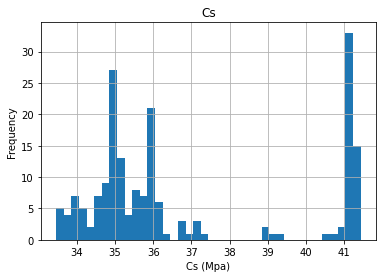

In [7]:
df_copy.hist(column='Cs', bins=40)
plt.ylabel('Frequency')
plt.xlabel('Cs (Mpa)')
plt.savefig('histograma_Cs.png', dpi=600)

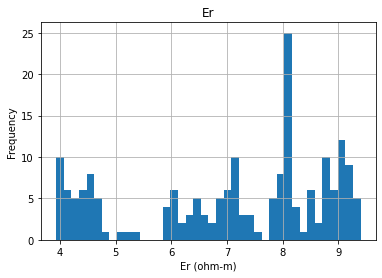

In [8]:
df_copy.hist(column='Er', bins=40)
plt.ylabel('Frequency')
plt.xlabel('Er (ohm-m)')
plt.savefig('histograma_Er.png',dpi=600)

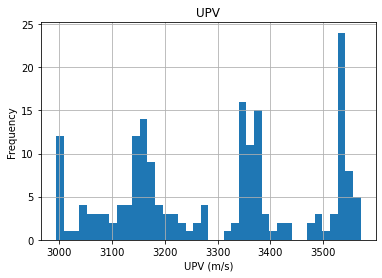

In [9]:
df_copy.hist(column='UPV', bins=40)
plt.ylabel('Frequency')
plt.xlabel('UPV (m/s)')
plt.savefig('histograma_Ts.png', dpi=600)

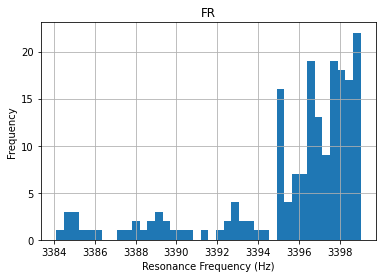

In [10]:
df_copy.hist(column='FR', bins=40)
plt.ylabel('Frequency')
plt.xlabel('Resonance Frequency (Hz)')
plt.savefig('histograma_FR.png', dpi=600)

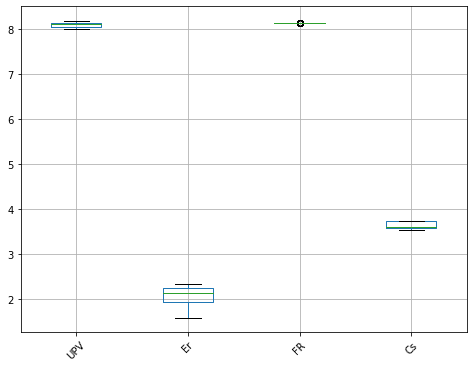

In [11]:
# Logarithmic box plot
np.log(1+df_copy).boxplot(figsize=(8,6))
plt.xticks(rotation=45);

#Matriz de correlación y su representación con mapas de calor
sns.set(style="ticks")
%matplotlib inline
plt.figure(figsize=(9, 4));
sns.heatmap(df.corr(),annot=True);
plt.savefig('Correlation.pdf')

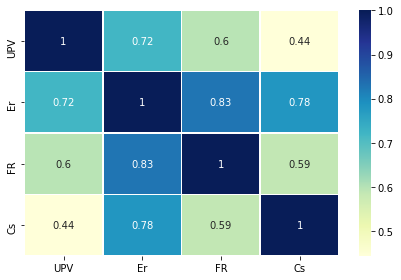

In [12]:
#Correlation matrix and its representation in heat maps
sns.heatmap(df_copy.corr(), linewidth=0.5,annot=True,cmap="YlGnBu") #<-If you are look going deeper visit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.tight_layout()
plt.savefig('Correlation.png',dpi=600)

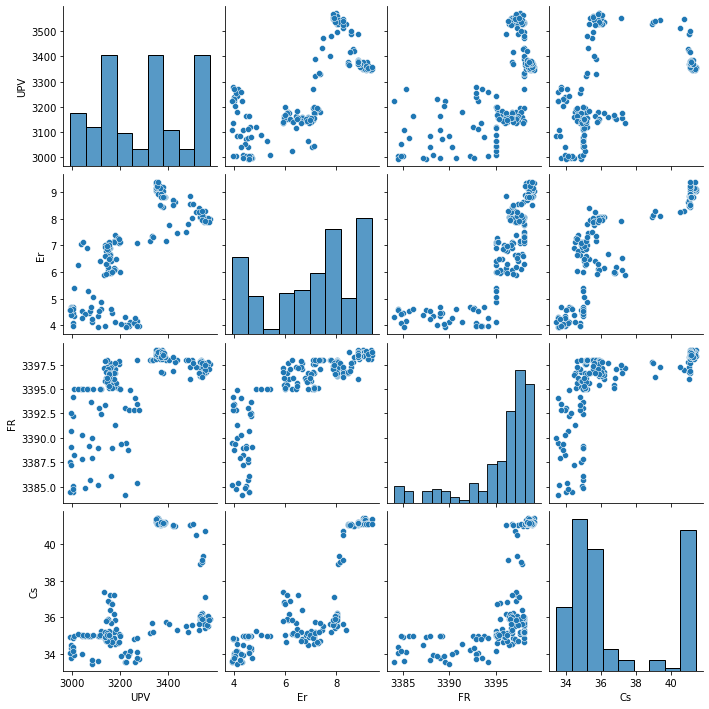

In [13]:
#Data distribution
sns.pairplot(df)
plt.savefig('Distribution.pdf')

In [14]:
# It's neccesary create a copy of our file and loading it as .txt file
df_copy=df_copy.to_csv('df_copy.csv', header=False, index=False)

In [15]:
df_copy = np.loadtxt('df_copy.csv',delimiter=',')

In [16]:
# Here we define the input data of the dataset
X = df_copy[:,0:-1]
X.shape

(190, 3)

In [17]:
# The targets are in the last column. That's how datasets are conventionally organized.
y = df_copy[:,-1]
y.shape

(190,)

## Standardize the inputs

In [18]:
scaled_inputs = preprocessing.scale(X)
scaled_outputs= preprocessing.scale(y)

## Split the dataset into train and test

In [19]:
# Creamos un split de datos
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, scaled_outputs, test_size=0.3, random_state=100) # we select a 30 percent for the testset

In [20]:
# Save the two datasets in *.npz.
# You will see that it is extremely valuable to name them in such a coherent way!
np.savez('Data_train', inputs=X_train, targets=y_train)
np.savez('Data_test', inputs=X_test, targets=y_test)